# Part II - An Exploration of Prosper Loan Data
## by Noelia Guzman

## Investigation Overview

My main point of interest with this exploration was to find if the listing category variable had any bearing on loan status outcomes.

## Dataset Overview

- This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Here is a summary of key findings that will be covered in this presentation:


- **Listing Category**: 56% of loans are categorized as Debt Consolidation
- **Loan Status**: The majority of the loans have a Current or Completed status.
- **Debt to Income Ratio (DIR) v Loan Status**: 'Defaulted', 'Cancelled', and 'Chargedoff' loan statuses had higher DIRs (41%, 34%, and 33% average DIR, respectively) compared to the overall mean DIR (27%)
- **DIR v Loan Status v Listing Category v Income Range**: Within the top 5 listing categories, there was a strong negative correlation between income range and average DIR. 
- **Conclusion for further investigation**: Perform a further deep dive into the borrowers within the Debt Consolidation listing category.
- **Suggestion for further improvement**: Re-evaluate the 'Employment Status' variable.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data_copy = loan_data.copy()

In [3]:
selected_variables = ['ListingNumber',
            'ListingCreationDate',
            'Term',
            'LoanStatus',
            'BorrowerAPR',
            'ListingCategory (numeric)',
            'BorrowerState',
            'Occupation',
            'EmploymentStatus',
            'EmploymentStatusDuration',
            'DebtToIncomeRatio',
            'IncomeRange',
            'IncomeVerifiable',
            'StatedMonthlyIncome',
            'LoanOriginalAmount',
            'MonthlyLoanPayment']

df_prosper_clean = loan_data_copy[selected_variables]

In [4]:
rename_dict = {'ListingNumber':'listing_number',
            'ListingCreationDate':'listing_creation_date',
            'Term':'term',
            'LoanStatus':'loan_status',
            'BorrowerAPR':'borrower_apr',
            'ListingCategory (numeric)':'listing_category_num',
            'BorrowerState':'borrower_state',
            'Occupation':'occupation',
            'EmploymentStatus':'employment_status',
            'EmploymentStatusDuration':'employment_status_duration',
            'DebtToIncomeRatio':'debt_income_ratio',
            'IncomeRange':'income_range',
            'IncomeVerifiable':'income_verifiable',
            'StatedMonthlyIncome':'stated_monthly_income',
            'LoanOriginalAmount':'loan_original_amount',
            'MonthlyLoanPayment':'monthly_loan_payment'}

df_prosper_clean = df_prosper_clean.rename(columns=rename_dict)

In [5]:
category_names = {
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby & Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'
}


df_prosper_clean['listing_category_name'] = df_prosper_clean['listing_category_num'].apply(lambda x: category_names[x])

In [6]:
ordinal_var_dict = {
    'income_range': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
    'loan_status' : ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Chargedoff', 'Defaulted', 'Cancelled']
}

for col in ordinal_var_dict:
    df_prosper_clean[col] = df_prosper_clean[col].astype("category")
    df_prosper_clean[col] = df_prosper_clean[col].cat.set_categories(
        ordinal_var_dict[col], ordered=True
    )

In [7]:
df_prosper_clean = df_prosper_clean.dropna(how='any')

In [8]:
plot_color = sns.color_palette()[4]

In [9]:
#Prerequisite code for Visual 3

df_debt_loan_status = df_prosper_clean[['debt_income_ratio', 'loan_status']].groupby('loan_status').mean('debt_income_ratio')

df_debt_loan_status = df_debt_loan_status.reset_index()

status_list = df_debt_loan_status['loan_status'].to_list()

## Univariate Exploration of Listing Categories

- The purpose of this visualization was to see the distribution of loans by listing categories. The visual showed that the majority of loans, by far, were applied for under the Debt Consolidation category. These loans made up about 56% of the data. This became a point of interest as interactions between variables within the Debt Consolidation listing category could show correlations that could then be used to make decisions about providing or denying loans to borrowers.

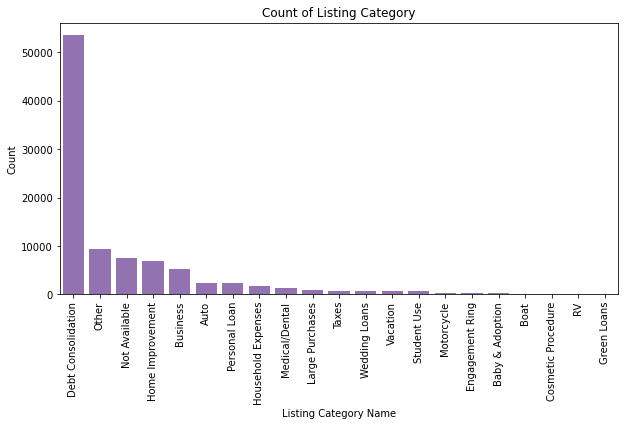

In [10]:
plt.figure(figsize = [10, 5])
sns.countplot(data = df_prosper_clean, x = 'listing_category_name', color = plot_color, order = df_prosper_clean['listing_category_name'].value_counts().index).set(title='Count of Listing Category', xlabel = 'Listing Category Name', ylabel= 'Count')
plt.xticks(rotation=90);

## Univariate Exploration of Loan Status

- The purpose of this visualization was to see the distribution of loans by loan status. The majority of the loans have a 'Current' or 'Completed' status. Surprisingly though, the difference between those and the 'Chargedoff' or 'Defaulted' loans is greater than expected. We can observe that the number of Completed loans alone are about 3 times greater than that of Chargedoff loans. As with the listing category variable, loan status became a point of interest as to whether other variables attributed to loan status outcomes. 

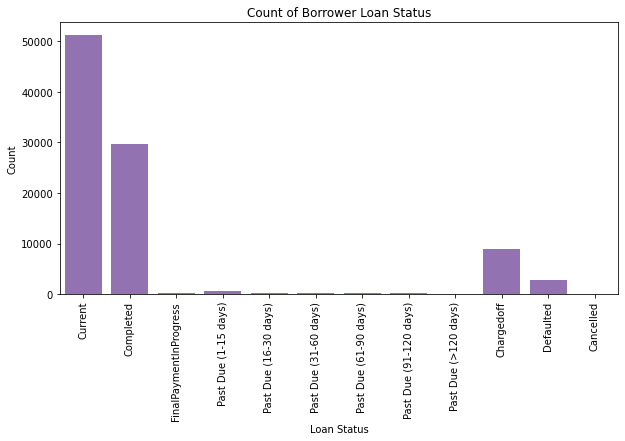

In [11]:
plt.figure(figsize = [10, 5])
sns.countplot(data = df_prosper_clean, x = 'loan_status', color = plot_color).set(title='Count of Borrower Loan Status', xlabel = 'Loan Status', ylabel= 'Count')
plt.xticks(rotation=90);

## Bivariate Exploration of Debt to Income Ratio (DIR) and Loan Status

- The purpose of this visualization was to find how DIR and loan status, 2 features of interest, interacted with each other. This is where initial correlations between features of interest started to surface. This visualization begins to show how there is a correlation between debt to income ratio and loan status. Expectedly, loans that were Defaulted had the highest debt to income ratio on average (41%). Canceled and Charged off loans also had higher debt to income ratios on average (34% and 33%, respectively).


- Surprisingly, the number of days a loan was past due did not seem to have a direct relationship to debt to income ratio. We can see this, for instance, when comparing the average ratio for 'Past Due (>120 days)' and 'Past Due (61-90 days).' Although the latter loan status is indicating for the loan less days overdue, the debt to income ratio is 10% higher than loans that were over 120 days past due. We see this inconsistency in the relationship between number of days overdue and the debt to income ratio throughout the visual of these variables.


- Another surprising find is that Completed loans did not have the lowest on average debt to income ratio. On average, Final Payment in Progress loans had the lowest debt to income ratio.


- Moving forward, other features of interest, term and income range, were included to see how these existing correlations may be strengthened. Additionally, the point of interest, as to whether listing category has any bearing on loan status outcomes is yet to be confirmed!

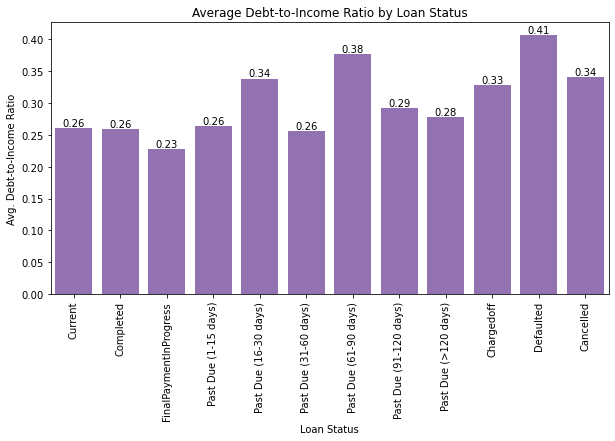

In [12]:
#Call the plot once more, this time making it larger as we are adding another visual element
plt.figure(figsize = [10, 5])
sns.barplot(data = df_debt_loan_status, x = 'loan_status', y = 'debt_income_ratio', color = plot_color).set(title='Average Debt-to-Income Ratio by Loan Status', xlabel='Loan Status', ylabel='Avg. Debt-to-Income Ratio')
plt.xticks(rotation = 90);

# Get the height of each bar
bar_heights = df_debt_loan_status['debt_income_ratio'].values

# Iterate over the bars
for i, bar in enumerate(bar_heights):
    # Get the x and y coordinates of the bar
    x = i
    y = bar
    # Add the value above the bar using the plt.text() function
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

## Multivariate Exploration of Listing Category, Loan Status, DIR, and Income Range

- The purpose of this visualization was to find if there were correlations between the features of interest that may point to indicators of loan status outcomes. My initial thought that there would be a correlation between listing category and loan status did not come to fruition throughout this analysis. 


- Whether the loan had a positive or negative loan status outcome was not strongly related to the listing category. Though, the listing category itself proved to be a good basis to help observe and strengthen other correlations. These included the correlation between DIR and loan status. A loan status that was either Defaulted or Chargedoff showed the borrower had a higher DIR (41% and 33% average DIR, respectively).


- Another correlation observed within the top 5 listing categories was between income range, average DIR, and loan status. There was a strong negative correlation between income range and average DIR. Borrowers within the 1-24,999 income range had higher DIRs on average. This then correlated to the even high average DIRs observed for that income range within the Defaulted loan status. Thus, this points to a third variable that has strong correlations to closed loan status outcomes.

In [13]:
#Prerequisite code for Visual 4
df_dir_ls_lc_ir = df_prosper_clean.copy()

df_dir_ls_lc_ir['income_range'] = df_dir_ls_lc_ir['income_range'].astype(str)
df_dir_ls_lc_ir['loan_status'] = df_dir_ls_lc_ir['loan_status'].astype(str)

condition_1 = (df_dir_ls_lc_ir['loan_status'] == 'Completed') | (df_dir_ls_lc_ir['loan_status'] == 'Defaulted') | (df_dir_ls_lc_ir['loan_status'] == 'Chargedoff') | (df_dir_ls_lc_ir['loan_status'] == 'Current') | (df_dir_ls_lc_ir['loan_status'] == 'Cancelled')

df_dir_ls_lc_ir = df_dir_ls_lc_ir[condition_1]

ordinal_var_dict = {
    'loan_status' : ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Cancelled']
}

for col in ordinal_var_dict:
    df_prosper_clean[col] = df_prosper_clean[col].astype("category")
    df_prosper_clean[col] = df_prosper_clean[col].cat.set_categories(
        ordinal_var_dict[col], ordered=True
    )

condition_4 = (df_dir_ls_lc_ir['income_range'] == '$1-24,999') | (df_dir_ls_lc_ir['income_range'] == '$25,000-49,999') | (df_dir_ls_lc_ir['income_range'] == '$50,000-74,999') | (df_dir_ls_lc_ir['income_range'] == '$75,000-99,999') | (df_dir_ls_lc_ir['income_range'] == '$100,000+')
df_dir_ls_lc_ir = df_dir_ls_lc_ir[condition_4]


condition_5 = (df_dir_ls_lc_ir['listing_category_name'] == 'Debt Consolidation') | (df_dir_ls_lc_ir['listing_category_name'] == 'Other') | (df_dir_ls_lc_ir['listing_category_name'] == 'Not Available') | (df_dir_ls_lc_ir['listing_category_name'] == 'Home Improvement') | (df_dir_ls_lc_ir['listing_category_name'] == 'Business')
df_dir_ls_lc_ir = df_dir_ls_lc_ir[condition_5]

df_dir_ls_lc_ir_2 = df_dir_ls_lc_ir[['debt_income_ratio', 'loan_status', 'listing_category_name', 'income_range']].groupby(['listing_category_name', 'loan_status', 'income_range']).mean('debt_income_ratio')

df_dir_ls_lc_ir_2 = df_dir_ls_lc_ir_2.reset_index()

df_dir_ls_lc_ir_2['debt_income_ratio'] = df_dir_ls_lc_ir_2['debt_income_ratio'].round(2)

rename_dict_3 = {'income_range':'Income Range'
                }
df_dir_ls_lc_ir_2 = df_dir_ls_lc_ir_2.rename(columns=rename_dict_3)

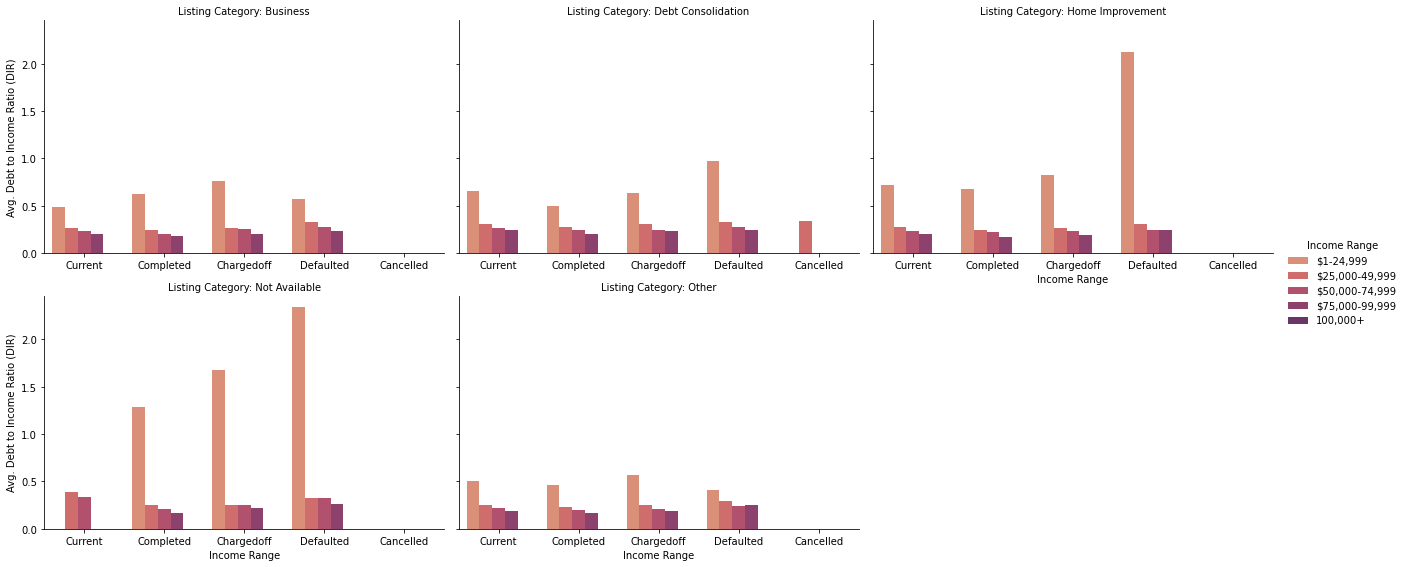

In [14]:
income_range_xlist = ['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999', '100,000+']
loan_order = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Cancelled']

#Create sns.catplot() using the cleaned dataset df_prosper_clean
g = sns.catplot(
        x= 'loan_status', 
        y='debt_income_ratio', 
        data=df_dir_ls_lc_ir_2,
        hue='Income Range',
        hue_order=income_range_xlist,
        order= loan_order,
        #legend=False,
        sharex=False,
        #sharey=False, #Including this parameter better shows the length of the error bars for further investigation, 
                    #but can be misleading due to varied y-axis values
        palette= 'flare',
        height=4, 
        aspect=1.5,
        kind='bar', 
        col ='listing_category_name',
        col_wrap=3
)


g.set_titles(template='Listing Category: {col_name}')
g.set_ylabels(label='Avg. Debt to Income Ratio (DIR)')
g.set_xlabels(label='Income Range');

## Conclusions and Final Thoughts

- One conclusion for further investigation is to perform a further deep dive into the borrowers within the Debt Consolidation listing category. After cleaning the data, about 56% of borrower data came from that category alone! I believe by further inspecting correlations within this category, the company can better understand features that may predict how Current loans may result for the existing borrowers (as the majority of loans are under the 'Current' status). This can then lead to better decisions about how borrowers may be given acceptance or denial to loans provided by Prosper.


- One suggestion for further improvement is to re-evaluate the 'Employment Status' variable. As it stands now, this variable is seemingly ambiguous. The reason for separating the statuses 'Full-time' and 'Part-time' vs 'Employed' not clear. Why were these statuses distinct? This made me hesitant to work with the variable as this could mean the data could be skewed with overlapping statuses. For instance, a borrower may have selected 'Employed' while also being a part-time worker. In this case, results for any of the statuses where overlap could occur may be skewed. Instead, it may provide more accuracy in the data to use the following Employment Status options for borrowers: Full-time, Part-time, Self-employed, Other, Retired, and Not employed. The removal of the general "Employed" status can more accurately contribute to the statistics and distribution of data within the Full-time and Part-time statuses.

### Generate Slideshow

In [17]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Exploration_Prosper_Data_slide_deck.ipynb --to slides --post serve --no-input --no-prompt